<img src="https://medellin.unal.edu.co/eventos/panam2018/images/imagenes/organizan_2.png" width="40%">

# Procesamiento Digital de Imágenes

## Departamento de ingeniería eléctrica, electrónica y computación
## Sede Manizales

### Profesores Diego Pérez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import AffineTransform, warp, ProjectiveTransform, swirl
from skimage.draw import rectangle
from skimage import data
from skimage.util import img_as_float


# Transformaciones Geométricas

Una **transformación geométrica** cambia la posición, forma o tamaño de una imagen o figura sin alterar su contenido interno. Estas transformaciones son fundamentales en áreas como visión por computadora, gráficos computacionales y procesamiento de imágenes.

Existen dos grandes grupos:

- **Transformaciones Afines**: preservan líneas rectas, paralelismo y proporciones relativas.
- **Transformaciones No Afines**: pueden curvar, deformar o alterar proporcionalidades entre los objetos.


## Transformaciones Afines

Una transformación afín se define matemáticamente como:
$
\mathbf{x}' = A\mathbf{x} + \mathbf{t}
$

Donde:

- $ \mathbf{x} $ y $ \mathbf{x}' $ son los vectores de coordenadas originales y transformadas.
- $ A $ es una matriz $ 2 \times 2 $ que representa rotaciones, escalas y cizallamientos.
- $ \mathbf{t} $ es un vector de traslación.




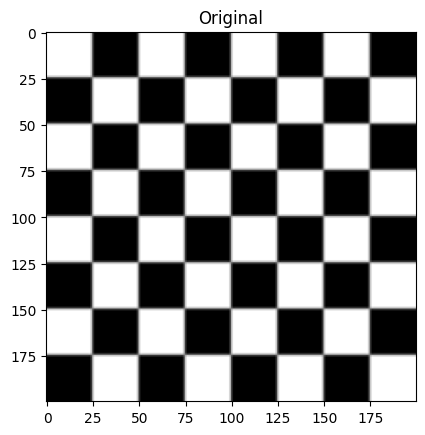

In [ ]:
def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

image = data.checkerboard()
image = img_as_float(image)# Imagen original para comparación
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.show()

### Traslación

La **traslación** desplaza una imagen o figura en el plano sin rotarla ni cambiar su tamaño.

#### Definición Matemática:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}
\end{equation}

Donde:

- $x, y $: coordenadas originales.
- $ x', y' $: coordenadas transformadas.
- $ t_x, t_y $: desplazamiento horizontal y vertical respectivamente.

Es una transformación afín porque puede representarse como:

\begin{equation}
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\end{equation}


Text(0.5, 1.0, 'Traslación')

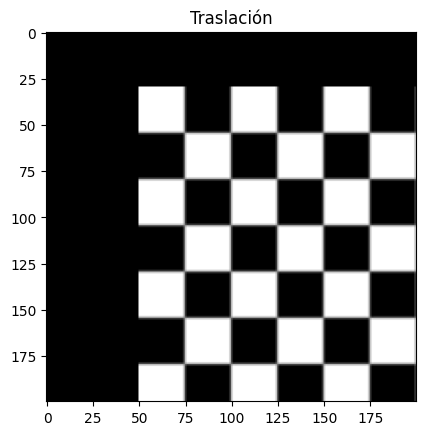

In [ ]:
tform = AffineTransform(translation=(50, 30))
translated = warp(image, tform.inverse)
plt.imshow(translated, cmap='gray')
plt.title("Traslación")

### Rotación

La **rotación** gira una figura alrededor del origen (o de un punto específico).

#### Definición Matemática:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}
Donde:

- $ \theta $ es el ángulo de rotación (en radianes).
- El giro es antihorario si $ \theta > 0 $.

Forma homogénea (afín):

\begin{equation}
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\end{equation}


Text(0.5, 1.0, 'Rotación')

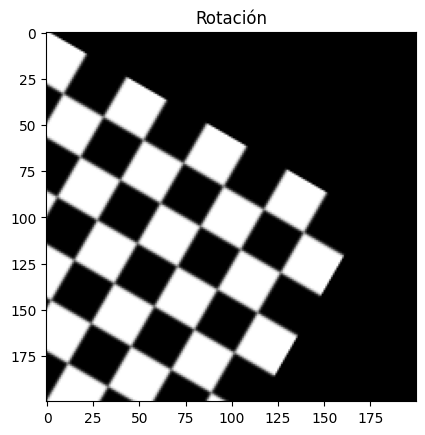

In [ ]:
tform = AffineTransform(rotation=np.deg2rad(30))
rotated = warp(image, tform.inverse)
plt.imshow(rotated, cmap='gray')
plt.title("Rotación")

### 🔹 Escalamiento

El **escalamiento** cambia el tamaño de una imagen o figura respecto al origen.

#### Definición Matemática:
\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}


Donde:

- $s_x $, $ s_y $: factores de escala en los ejes x e y respectivamente.

Forma homogénea:
\begin{equation}
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix}
=
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\end{equation}



Text(0.5, 1.0, 'Escala')

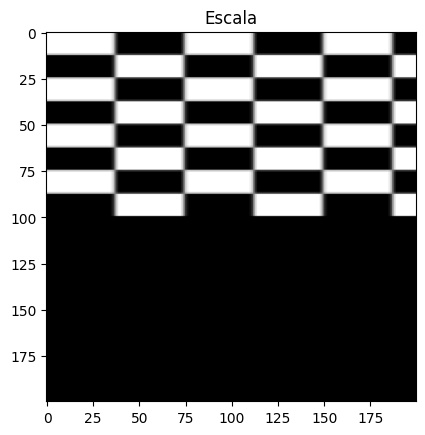

In [ ]:
tform = AffineTransform(scale=(1.5, 0.5))
scaled = warp(image, tform.inverse)
plt.imshow(scaled, cmap='gray')
plt.title("Escala")

### 🔹 Cizallamiento (Shearing)

El **cizallamiento** deforma la figura deslizando líneas paralelas en una dirección.

#### Definición Matemática:

**Shear en X:**

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
1 & \tan(\alpha) \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}


**Shear en Y:**
\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
\tan(\beta) & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}


Donde:

- $\alpha$ o $\beta$: ángulos que definen el grado de cizallamiento.

Forma homogénea para shear en X:

\begin{equation}
\begin{bmatrix}
1 & \tan(\alpha) & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation}



Text(0.5, 1.0, 'Cizallamiento')

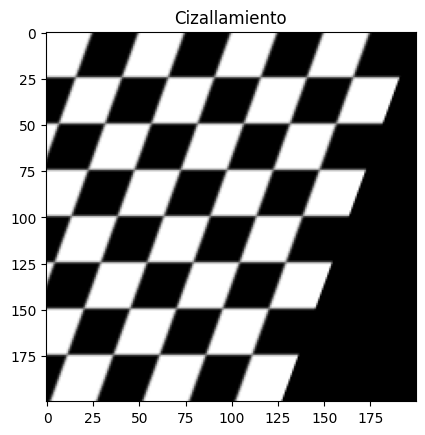

In [ ]:
# Cizallamiento (shearing)
tform = AffineTransform(shear=np.deg2rad(20))
sheared = warp(image, tform.inverse)
plt.imshow(sheared, cmap='gray')
plt.title("Cizallamiento")

## Transformaciones No Afines

Las **transformaciones no afines** no pueden ser representadas con una simple combinación lineal. Generalmente se expresan como:

$
\mathbf{x}' = f(\mathbf{x})
$
Donde $ f $ es una función no lineal. Estas transformaciones permiten deformaciones complejas y efectos como:

- **Deformaciones elásticas**
- **Transformaciones no lineales (radiales, sinusoidales, etc.)**
- **Transformaciones proyectivas o de perspectiva**


### Deformación Elástica (Swirl)

Una deformación elástica simula un estiramiento o compresión suave y continuo.

Ejemplo: **swirl**, donde los puntos rotan alrededor de un centro con fuerza decreciente según su distancia.

No tiene una forma matricial fija, pero se representa como:
\begin{equation}
\mathbf{x}' = f(\mathbf{x}) = R(\theta(r)) \cdot (\mathbf{x} - \mathbf{c}) + \mathbf{c}
\end{equation}


Donde:

- $ R(\theta(r)) $: matriz de rotación con ángulo que depende de la distancia al centro.
- $ \mathbf{c} $: centro del swirl.
- Es un mapeo **no lineal** dependiente de la posición.


Text(0.5, 1.0, 'Deformación Elástica (Swirl)')

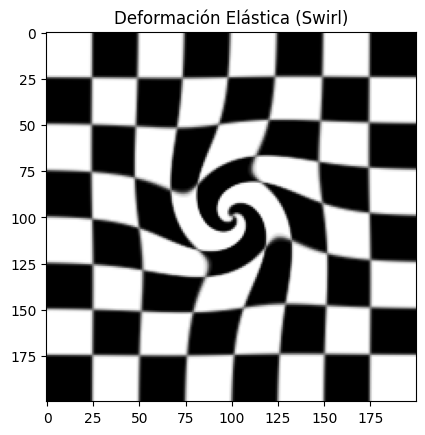

In [ ]:
swirled = swirl(image, strength=5, radius=100)
plt.imshow(swirled, cmap='gray')
plt.title("Deformación Elástica (Swirl)")

### Transformaciones No Lineales (Radiales)

Aplican cambios que dependen del valor de \( x \) e \( y \) de forma no lineal.

Ejemplo:
\begin{equation}
x' = x + \lambda \cdot r^2, \quad y' = y + \lambda \cdot r^2
\quad \text{con} \quad r = \sqrt{(x - x_0)^2 + (y - y_0)^2}
\end{equation}


Donde:

- $ \lambda $: parámetro de deformación.
- $ (x_0, y_0) $: centro de la deformación.

Estas transformaciones **curvan** la imagen, creando efectos de onda, zoom, o distorsión radial.


Text(0.5, 1.0, 'Transformación Proyectiva')

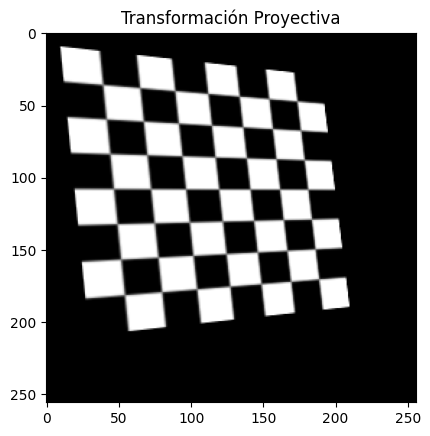

In [ ]:
# Proyectiva (perspectiva)
src = np.array([[0, 0], [0, 200], [200, 200], [200, 0]])
dst = np.array([[10, 10], [30, 210], [210, 190], [190, 30]])
tform_proj = ProjectiveTransform()
tform_proj.estimate(src, dst)
warped_proj = warp(image, tform_proj.inverse, output_shape=(256, 256))
plt.imshow(warped_proj, cmap='gray')
plt.title("Transformación Proyectiva")

###  Transformación Proyectiva (Perspectiva)

Permite transformar una imagen como si se cambiara el ángulo de vista (perspectiva).

#### Forma matemática (en coordenadas homogéneas):
\begin{equation}
\begin{bmatrix}
x' \\
y' \\
w'
\end{bmatrix}
=
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
\Rightarrow
(x', y') = \left(\frac{x'}{w'}, \frac{y'}{w'}\right)
\end{equation}

- Esta transformación **no preserva líneas paralelas**.
- Se utiliza para corregir distorsiones de cámara o simular perspectiva.


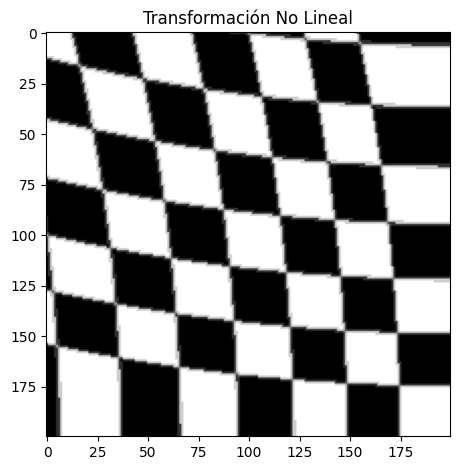

In [ ]:
#Transformación no lineal (manual, ejemplo radial)
coords = np.indices(image.shape).astype(np.float32)
x, y = coords[1], coords[0]
r = np.sqrt((x - 200)**2 + (y - 200)**2)
x_new = x + 0.0005 * r**2
y_new = y + 0.0005 * r**2
nonlinear = image[np.clip(y_new.astype(int), 0, image.shape[0]-1),
                  np.clip(x_new.astype(int), 0, image.shape[1]-1)]
plt.imshow(nonlinear, cmap='gray')
plt.title("Transformación No Lineal")
plt.tight_layout()
plt.show()


#Conclusiones

| Tipo de Transformación | Preserva Líneas | Preserva Ángulos | Curva Imágenes | Ventajas | Desventajas |
|------------------------|------------------|------------------|----------------|----------|-------------|
| Afín                   | ✅                | ❌                | ❌              | Fácil de implementar, computacionalmente barata | No permite distorsiones complejas |
| No Afín (Elástica, Proyectiva) | ❌                | ❌                | ✅              | Flexible, útil para registro y distorsiones | Más costosa, más compleja de controlar |
